In [1]:
import numpy as np 
import pandas as pd 
import os
print(os.listdir("./Data"))

['TestingData', 'TrainingData']


In [2]:
import keras
print(keras.__version__)

Using TensorFlow backend.


2.2.4


In [3]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
from keras.models import Sequential, load_model
from keras.layers import Activation, Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.utils.np_utils import to_categorical
from keras.regularizers import l2
from keras.initializers import RandomNormal, VarianceScaling
%matplotlib inline

In [4]:
img_x=img_y = 70
path = "./Data/TrainingData/"
imgs = []
labels= []
brands = os.listdir(path)
print(brands)
for idcar, brand in enumerate(brands):
    img = os.listdir(path+brand)
    for i, value in enumerate(img):
        imgs.append(value)
        labels.append(idcar)

['Buick', 'Chery', 'Citroen', 'Honda', 'Hyundai', 'Lexus', 'Mazda', 'Peugeot', 'Toyota', 'VW']


In [6]:
from PIL import Image
images = np.array([ np.array( Image.open(path+brands[labels[i]]+'/'+value).convert("RGB")).flatten() for i, value in enumerate(imgs)], order='F', dtype='uint8')
print('total images: ', np.shape(images) )

SyntaxError: invalid syntax (<ipython-input-6-8468a2f3547e>, line 2)

In [15]:
dataset, labelset = shuffle(images, labels, random_state=42)
train_data = [dataset, labelset] 

In [16]:
X_train, X_val, y_train, y_val = train_test_split( train_data[0], train_data[1], test_size=0.2)

In [17]:
def ImageConvert(n, i):
    im_ex = i.reshape(n, img_x, img_y, 3)
    im_ex = im_ex.astype('float32') / 255
    im_ex = np.subtract(im_ex, 0.5)
    im_ex = np.multiply(im_ex, 2.0)
    return im_ex
X_train = ImageConvert(X_train.shape[0], X_train)
X_val = ImageConvert(X_val.shape[0], X_val)

In [19]:
Y_train = to_categorical(y_train, num_classes=len(brands))
Y_val = to_categorical(y_val, num_classes=len(brands))

In [21]:
model = Sequential()
model.add(Conv2D(32, (3,3),
                     input_shape=(img_x,img_y,3),
                     padding='valid',
                     bias_initializer='glorot_uniform',
                     kernel_regularizer=l2(0.00004),
                     kernel_initializer=VarianceScaling(scale=2.0, mode='fan_in', distribution='normal', seed=None),
                     activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
    
model.add(Conv2D(64, (3,3),
                     padding='valid',
                     bias_initializer='glorot_uniform',
                     kernel_regularizer=l2(0.00004),
                     kernel_initializer=VarianceScaling(scale=2.0, mode='fan_in', distribution='normal', seed=None),
                     activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
    
model.add(Conv2D(128, (3,3),
                     padding='valid',
                     bias_initializer='glorot_uniform',
                     kernel_regularizer=l2(0.00004),
                     kernel_initializer=VarianceScaling(scale=2.0, mode='fan_in', distribution='normal', seed=None),
                     activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
    
model.add(Conv2D(256, (3,3),
                     padding='valid',
                     bias_initializer='glorot_uniform',
                     kernel_regularizer=l2(0.00004),
                     kernel_initializer=VarianceScaling(scale=2.0, mode='fan_in', distribution='normal', seed=None),
                     activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
    
model.add(Flatten())
    
model.add(Dense(4096, activation='relu', bias_initializer='glorot_uniform'))
model.add(Dropout(0.5))
    
model.add(Dense(4096, activation='relu', bias_initializer='glorot_uniform'))
model.add(Dropout(0.5))
    
model.add(Dense(len(brands), activation='softmax'))
    
sgd = SGD(lr=0.005, decay=1e-6, momentum=0.95, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['categorical_accuracy'])
    
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 68, 68, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 34, 34, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxP

In [22]:
history = model.fit(X_train,
                    Y_train,
                    batch_size=32,
                    shuffle=True,
                    epochs=10,
                    verbose=1,
                    validation_data=(X_val, Y_val))

Instructions for updating:
Use tf.cast instead.
Train on 8000 samples, validate on 2000 samples
Epoch 1/10
8000/8000 [==============================] - 120s 15ms/step - loss: 1.2406 - categorical_accuracy: 0.5906 - val_loss: 0.1269 - val_categorical_accuracy: 0.9745
Epoch 2/10
8000/8000 [==============================] - 116s 15ms/step - loss: 0.1063 - categorical_accuracy: 0.9785 - val_loss: 0.0654 - val_categorical_accuracy: 0.9925
Epoch 3/10
8000/8000 [==============================] - 113s 14ms/step - loss: 0.0831 - categorical_accuracy: 0.9879 - val_loss: 0.0577 - val_categorical_accuracy: 0.9950
Epoch 4/10
8000/8000 [==============================] - 116s 15ms/step - loss: 0.0577 - categorical_accuracy: 0.9945 - val_loss: 0.0473 - val_categorical_accuracy: 0.9985
Epoch 5/10
8000/8000 [==============================] - 112s 14ms/step - loss: 0.0591 - categorical_accuracy: 0.9944 - val_loss: 0.0459 - val_categorical_accuracy: 0.9980
Epoch 6/10
8000/8000 [===========================

In [23]:
model.save("model.h5")

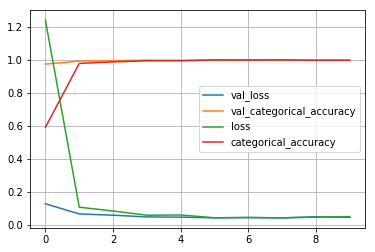

In [27]:
pd.DataFrame(history.history).plot()
plt.grid(True)
#plt.gca().set_ylim(0, 1) # set the vertical range to [0-1